# Setup

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/ANN_LEGO_Project/

/content/drive/MyDrive/ANN_LEGO_Project


In [37]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,575 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Err:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
  The following signatures couldn't be verified because the public key is not available: NO_PUBKEY A4B469963BF863CC
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bion

In [38]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
import os
import requests
import time
import shutil
from selenium import webdriver
from binascii import a2b_base64
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import pandas as pd
import numpy as np

import threading
from queue import Queue

thread_count = 50
threads = []

# Initial queue
queue = Queue(0)

from base64 import b64decode

# Helper Functions

In [ ]:
class Downloader(threading.Thread):
    def __init__(self, queue, thread):
        threading.Thread.__init__(self)
        self.queue = queue
        self.thread = thread

    def run(self):
        while self.queue.empty() == False:
            item = self.queue.get()

            # print("Thread:",self.thread,item)
            # time.sleep(3)
            download_from_url(item["url"], item["img_dir"], item["file_path"])

            self.queue.task_done()

def download_google_images(search_terms, num_images_requested=50):
    print("Downloading images from Google...")
    start_time = time.time()

    # Setup download folder
    downloads = "dataset"
    if not os.path.exists(downloads):
        shutil.mkdir(downloads)
    
    # Each scrolls provides 400 image approximately
    number_of_scrolls = int(num_images_requested / 400) + 1

    # Chrome Options
    options = webdriver.ChromeOptions()
    options.headless = True
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--ignore-certificate-errors')
    options.add_argument('--ignore-ssl-errors')

    # Create a browser instance
    browser = webdriver.Chrome("chromedriver", chrome_options=options)
    
    for search_term in search_terms:
        print("Searching for: ", search_term)
        search_url = 'https://www.google.com/search?q=' + search_term.replace(" ", "+") + '&tbm=isch'
        print("Search URL: ", search_url)
        browser.get(search_url)

        # Image urls
        img_urls = []
        img_elements = browser.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')
        
        for img_element in img_elements:
            # on the element we get the src
            img_url = img_element.get_attribute('src')
            print(img_url)
            
            if img_url:
                img_urls.append(img_url)
            # Wait up to 1 second
            time.sleep(np.random.uniform(0.2,1))

        # for _ in range(number_of_scrolls):
        #     for __ in range(10):
        #         # multiple scrolls needed to show all 400 images
        #         browser.execute_script("window.scrollBy(0, 1000000)")
        #         time.sleep(1)
        #     # to load next 400 images
        #     time.sleep(2)
        #     # try to find show more results bottom
        #     try:
        #         # if found click to load more image
        #         browser.find_element_by_xpath(
        #             "//input[@value='Show more results']").click()
        #     except Exception as e:
        #         # if not exit
        #         print("End of page")
        #         break
       
        print('Number of image urls found:', len(img_urls))


        # img_dir = os.path.join(downloads, search_term.lower().replace(" ", "_"))
        # if not os.path.exists(img_dir):
        #     os.makedirs(img_dir)

        # count = 0

        # for img_url in img_urls:
        #   img_path = os.path.join(img_dir, '{0}.jpg'.format(count))
        #   count += 1

        #   with open(img_path, 'wb') as f:
        #     if 'data:image/png;base64,' in img_url:
        #         # Get only revelant data, deleting "data:image/png;base64,"
        #         data = img_url.split(',', 1)[1]
        #         f.write(b64decode(data))
        #     else:


    # Quit the browser
    browser.quit()

    execution_time = (time.time() - start_time) / 60.0
    print("Download execution time (mins)", execution_time)








        # while len(imgs_urls) < min_num_imgs_requested:
        #     start_img_num = len(imgs_urls) + 1

        #     print(f"Searching for: '{search_term}' starting at image #{start_img_num}")
        #     search_url = "https://www.google.com/search?q=" + "'" + search_term + "'" + "&tbm=isch"
        #     print(f"\tURL: {search_url}")

        #     browser.get(search_url)

        #     # Find the urls of images
        #     url_elements = browser.find_elements_by_xpath('//img[@class="bRMDJf islir"]')
            
        #     if not url_elements:
        #         url_elements = browser.find_elements_by_xpath('//div[@class="ArOc1c"]/img')

        #     for url_element in url_elements:
        #         try:
        #             url = url_element.get_attribute('src')
        #         except e:
        #             print("Error getting image url")

        #         imgs_urls.add(url)

        #         # Wait
        #         time.sleep(np.random.uniform(0.2,1))

        #     new_imgs_found = len(imgs_urls) - start_img_num + 1
        #     print(f'\t\tNew images found: {new_imgs_found}')
        #     print(f'\t\tTotal so far: {len(imgs_urls)}')

        #     if new_imgs_found == 0:
        #         break

        #     # Wait 2 seconds
        #     time.sleep(np.random.uniform(0.2,1))

        # # Save the images
        # img_dir = os.path.join(
        #     downloads, search_term.lower().replace(" ", "_"))
        # if not os.path.exists(img_dir):
        #     os.makedirs(img_dir)

        # count = 0
        # for url in imgs_urls:
            
        #     file_path = os.path.join(img_dir, '{0}.jpg'.format(count))
        #     count += 1
        #     queue.put({"url": url, "img_dir": img_dir, "file_path": file_path})
        #     # else:
        #     #     # save data:image
        #     #     print(f'data:image: {url[:50]}')
        #     #     file_path = os.path.join(img_dir, '{0}.jpg'.format(count))
        #     #     print(f'file_path: {file_path}')
        #     #     count += 1
                


        # # Execute downloads from queue in a thread
        # for i in range(thread_count):
        #     thread = Downloader(queue, i)
        #     thread.start()
        #     threads.append(thread)
        # for thread in threads:
        #     thread.join()



Searching for:  lego architecture box
Search URL:  https://www.google.com/search?q=lego+architecture+box&tbm=isch




















None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Number of image urls found: 20
Searching for:  lego building
Search URL:  https://www.google.com/search?q=lego+building&tbm=isch




















None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Number of image urls found: 20
Download execution time (mins) 1.0648918509483338

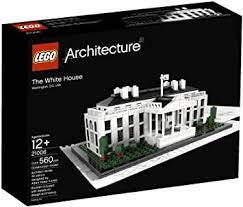
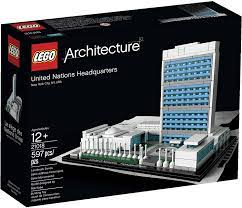
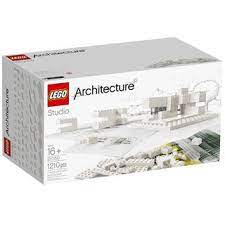
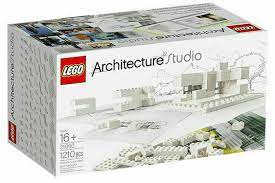
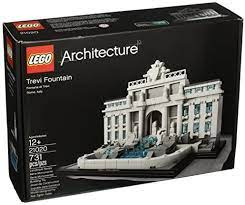
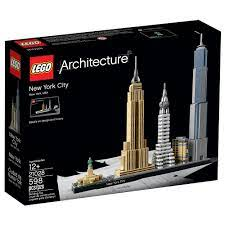
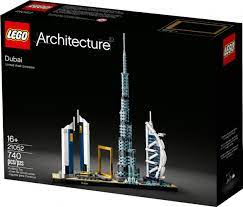
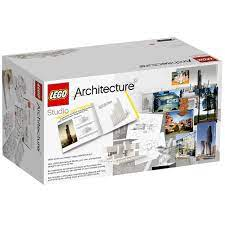
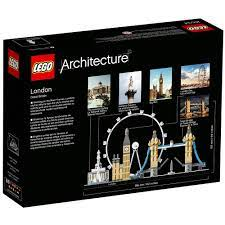
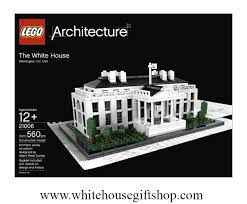
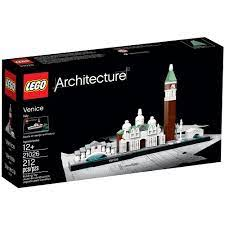
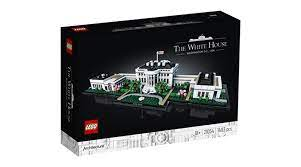
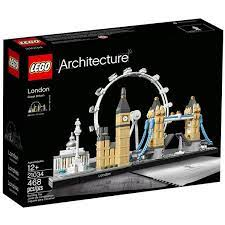
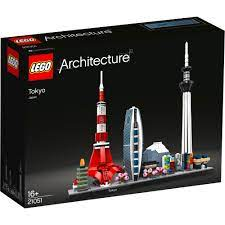
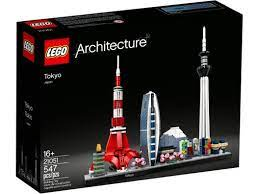
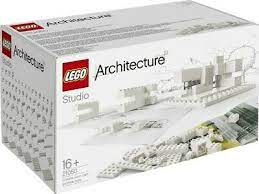
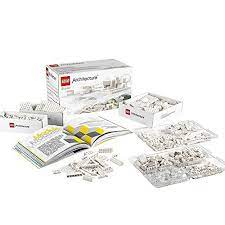
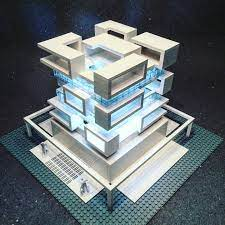
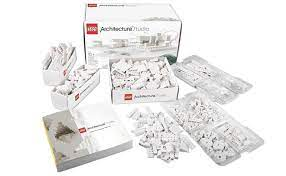
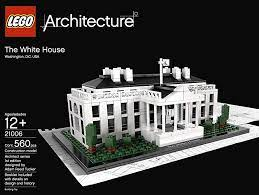
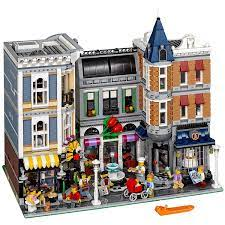
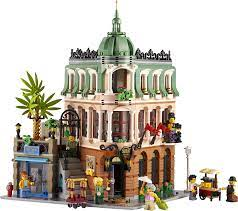
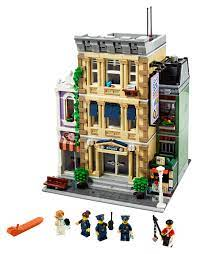
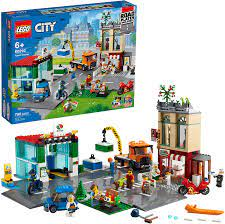
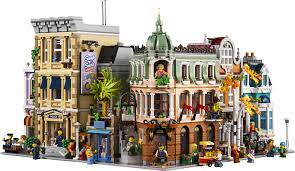
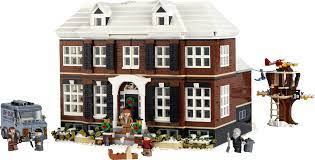
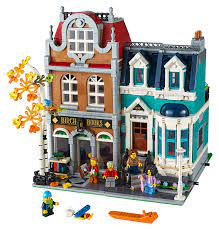
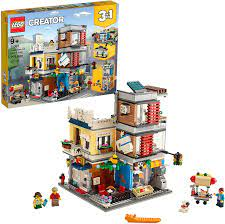
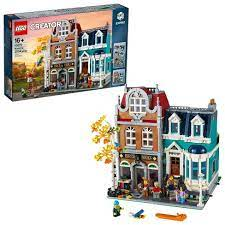
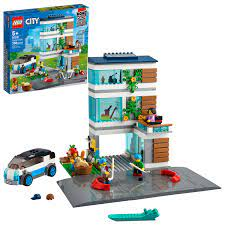
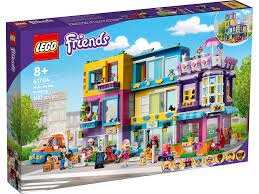
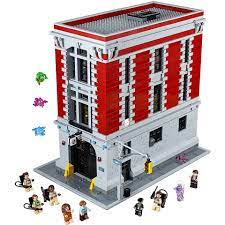
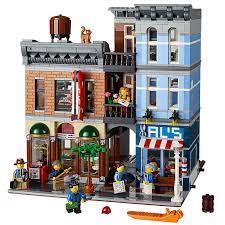
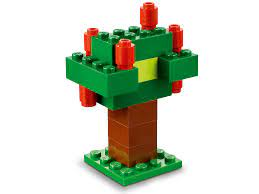
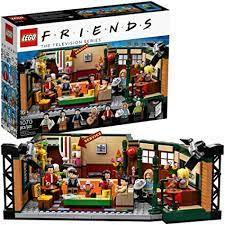
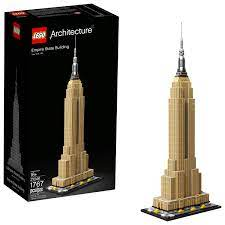
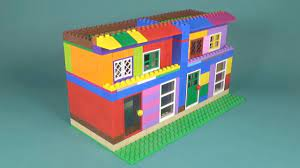
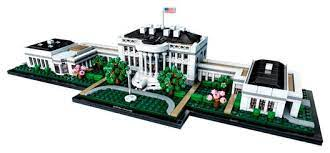
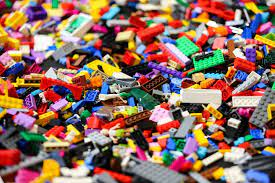
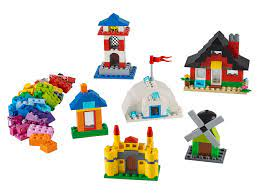

In [ ]:
download_google_images(['lego architecture box', 'lego building'], num_images_requested=10)

# Code for Downloading from Google

In [6]:
def download_google_images(search_terms):
    print("Downloading images from Google...")
    start_time = time.time()

    # Setup download folder
    downloads = "dataset"
    if not os.path.exists(downloads):
        shutil.mkdir(downloads)

    # Chrome Options
    options = webdriver.ChromeOptions()
    options.headless = True
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--ignore-certificate-errors')
    options.add_argument('--ignore-ssl-errors')

    # Create a browser instance
    browser = webdriver.Chrome("chromedriver", chrome_options=options)

    for search_term in search_terms:
        print("Searching for: ", search_term)
        search_url = 'https://www.google.com/search?q=' + search_term.replace(" ", "+") + '&tbm=isch'
        print("Search URL: ", search_url)
        browser.get(search_url)

        # Image urls
        img_urls = set()

        for _ in range(20):
            img_elements = browser.find_elements_by_xpath('//img[@class="rg_i Q4LuWd"]')
            if not img_elements:
                img_elements = browser.find_elements_by_xpath('//div[@class="bRMDJf islir"]/img')

            for img_element in img_elements:
                # on the element we get the src
                img_url = img_element.get_attribute('src')

                if img_url:
                    img_urls.add(img_url)

            # Wait up to 1 second
            time.sleep(np.random.uniform(0.2,1))

            browser.execute_script("window.scrollBy(0, 100000)")

        print('Number of image urls found:', len(img_urls))


        img_dir = os.path.join(downloads, search_term.lower().replace(" ", "_"))
        if not os.path.exists(img_dir):
            os.makedirs(img_dir)

        count = 0

        for img_url in img_urls:
          img_path = os.path.join(img_dir, '{0}.jpg'.format(count))
          count += 1

          with open(img_path, 'wb') as f:
            if 'data:image' in img_url:
                # Get only revelant data, deleting "data:image/png;base64,"
                data = img_url.split(',', 1)[1]
                f.write(b64decode(data))
            else:
                page = requests.get(img_url)
                f.write(page.content)

    # Quit the browser
    browser.quit()

    execution_time = (time.time() - start_time) / 60.0
    print("Download execution time (mins)", execution_time)

# Function to Download from bricklink

- `search_category_ids`
- go through every `search_category_id` in `search_category_ids`
- go to 1st page of the search query
- search for images on the 1st page
- go to next page
- if the image already in the dataset, terminate
- figure out how to format image count number by doing something like `count = 0 + (page_number - 1) * 50`
- figure out how to get high resolution images instead of low resolution thumbnails

## Version #1.0: downloads each category into a separate folder

In [24]:
def download_bricklink_images(search_category_ids):
    print("Downloading images from bricklink...")
    start_time = time.time()

    # Setup download folder
    downloads = "dataset"
    if not os.path.exists(downloads):
        shutil.mkdir(downloads)

    # Chrome Options
    options = webdriver.ChromeOptions()
    options.headless = True
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--ignore-certificate-errors')
    options.add_argument('--ignore-ssl-errors')

    # Create a browser instance
    browser = webdriver.Chrome("chromedriver", chrome_options=options)

    for search_category_id in search_category_ids:
        print("Searching for images from category ID: ", search_category_id)

        # Image urls
        img_urls = set()

        page_number = 1
        while True:
            # if any of the found img_url is already in img_urls, break the loop of expanding img_urls and proceed to saving
            search_url = 'https://www.bricklink.com/catalogList.asp?pg=' + str(page_number) + '&catString=' + search_category_id + '&catType=M'
            # print("Search URL: ", search_url) 
            browser.get(search_url)

            candidate_img_urls = set([element.get_attribute('src') for element in browser.find_elements_by_xpath('//img[@class="l-block l-relative"]')])

            if not candidate_img_urls.isdisjoint(img_urls):
                break
            
            img_urls.update(candidate_img_urls)
            page_number += 1
        
        print('Number of image urls found:', len(img_urls))


        img_dir = os.path.join(downloads, search_category_id.lower().replace(" ", "_"))
        if not os.path.exists(img_dir):
            os.makedirs(img_dir)

        count = 0

        for img_url in img_urls:
          img_path = os.path.join(img_dir, '{0}.jpg'.format(count))
          count += 1

          with open(img_path, 'wb') as f:
            if 'data:image' in img_url:
                # Get only revelant data, deleting "data:image/png;base64,"
                data = img_url.split(',', 1)[1]
                f.write(b64decode(data))
            else:
                page = requests.get(img_url)
                f.write(page.content)

    # Quit the browser
    browser.quit()

    execution_time = (time.time() - start_time) / 60.0
    print("Download execution time (mins)", execution_time)

In [ ]:
all_search_category_ids = ['747', '69', '1125', '124', '67', '804', '971', '920',
                           '789', '790', '746', '227', '390', '759', '61', '34', 
                           '573', '473', '65', '174', '768']


download_bricklink_images(all_search_category_ids)

## Version #2.0: downloads all images into the same `/minifigures` folder

In [63]:
def download_bricklink_images(search_category_ids):
    print("Downloading images from bricklink...")
    start_time = time.time()

    # Setup download folder
    downloads = "minifigures"
    if not os.path.exists(downloads):
        os.mkdir(downloads)

    # Chrome Options
    options = webdriver.ChromeOptions()
    options.headless = True
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--ignore-certificate-errors')
    options.add_argument('--ignore-ssl-errors')

    # Create a browser instance
    browser = webdriver.Chrome("chromedriver", chrome_options=options)

    count = 0

    for search_category_id in search_category_ids:
        print("Searching for images from category ID: ", search_category_id)

        # Image urls
        img_urls = set()

        page_number = 1
        while True:
            # if any of the found img_url is already in img_urls, break the loop of expanding img_urls and proceed to saving
            search_url = 'https://www.bricklink.com/catalogList.asp?pg=' + str(page_number) + '&catString=' + search_category_id + '&catType=M'
            # print("Search URL: ", search_url) 
            browser.get(search_url)

            candidate_img_urls = set([element.get_attribute('src') for element in browser.find_elements_by_xpath('//img[@class="l-block l-relative"]')])

            if not candidate_img_urls.isdisjoint(img_urls):
                break
            
            img_urls.update(candidate_img_urls)
            page_number += 1
        
        print('Number of image urls found:', len(img_urls))

        for img_url in img_urls:
            img_path = os.path.join(downloads, '{0}.jpg'.format(count))
            count += 1

            with open(img_path, 'wb') as f:
                if 'data:image' in img_url:
                    # Get only revelant data, deleting "data:image/png;base64,"
                    data = img_url.split(',', 1)[1]
                    f.write(b64decode(data))
                else:
                    page = requests.get(img_url)
                    f.write(page.content)

    print('Total images downloaded:', count)

    # Quit the browser
    browser.quit()

    execution_time = (time.time() - start_time) / 60.0
    print("Download execution time (mins)", execution_time)

In [64]:
all_search_category_ids = ['747', '69', '1125', '124', '67', '804', '971', '920',
                           '789', '790', '746', '227', '390', '759', '61', '34', 
                           '573', '473', '65', '174', '768']


download_bricklink_images(all_search_category_ids)

Searching for images from category ID:  747
Number of image urls found: 26
Searching for images from category ID:  69
Number of image urls found: 29
Searching for images from category ID:  1125
Number of image urls found: 47
Searching for images from category ID:  124
Number of image urls found: 87
Searching for images from category ID:  67
Number of image urls found: 3082
Searching for images from category ID:  804
Number of image urls found: 83
Searching for images from category ID:  971
Number of image urls found: 86
Searching for images from category ID:  920
Number of image urls found: 93
Searching for images from category ID:  789
Number of image urls found: 110
Searching for images from category ID:  790
Number of image urls found: 54
Searching for images from category ID:  746
Number of image urls found: 684
Searching for images from category ID:  227
Number of image urls found: 368
Searching for images from category ID:  390
Number of image urls found: 279
Searching for images

# Preprocess Images

In [34]:
from PIL import Image     
import matplotlib.pyplot as plt                                         
import os, sys    
                   

path = "minifigures/"
dirs = os.listdir(path)                                       

def add_margin_resize(newsize=(60, 60)):
    count = 0
    for img_file in dirs:
        img = Image.open(os.path.join(path, img_file))

        width, height = img.size

        if height > width:
            right = left = int((height-width)/2)
            top = bottom = 0 

        else:
            top = bottom = int((width-height)/2)
            left = right = 0

        new_width = width + right + left
        new_height = height + top + bottom

        img_square = Image.new(img.mode, (new_width, new_height), (255, 255, 255))
        img_square.paste(img, (left, top))

        img_square_resized = img_square.resize(newsize)

        img_square_resized.save(path + img_file.strip('.jpg') + '_preprocessed.jpg', quality=100)

        if count % 100 == 0:
            print('minifigures_preprocessed/' + img_file)
        
        count += 1

add_margin_resize()


minifigures/7583_preprocessed.jpg
minifigures/7584_preprocessed.jpg
minifigures/7585_preprocessed.jpg
minifigures/7586_preprocessed.jpg
minifigures/7587_preprocessed.jpg
minifigures/7588_preprocessed.jpg
minifigures/7589_preprocessed.jpg
minifigures/7590_preprocessed.jpg
minifigures/7591_preprocessed.jpg
minifigures/7592_preprocessed.jpg
minifigures/7593_preprocessed.jpg
minifigures/7594_preprocessed.jpg
minifigures/7595_preprocessed.jpg
minifigures/7596_preprocessed.jpg
minifigures/7597_preprocessed.jpg
minifigures/7598_preprocessed.jpg
minifigures/7599_preprocessed.jpg
minifigures/7600_preprocessed.jpg
minifigures/7601_preprocessed.jpg
minifigures/7602_preprocessed.jpg


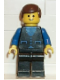

In [26]:
path = 'minifigures'
img_file = '7595_preprocessed.jpg'
img = Image.open(os.path.join(path, img_file))
width, height = img.size